Multi-Factor Investing: Strategies, Combinations, and Performance Analysis

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV files into pandas DataFrames
index_files = {
    'NIFTY100_EQUAL_WEIGHT': 'NIFTY100_EQUAL_WEIGHT.csv',
    'NIFTY500_MOMENTUM_50': 'NIFTY500_MOMENTUM_50.csv',
    'NIFTY50_EQUAL_WEIGHT': 'NIFTY50_EQUAL_WEIGHT.csv',
    'NIFTY_MIDCAP150_MOMENTUM_50': 'NIFTY_MIDCAP150_MOMENTUM_50.csv',
    'NIFTY_MIDCAP150_QUALITY_50': 'NIFTY_MIDCAP150_QUALITY_50.csv',
    'NIFTY_MICROCAP_250': 'NIFTY_MICROCAP_250.csv',
    'NIFTY_ALPHA_QUALITY_VALUE_LOW_VOLATILITY_30': 'NIFTY_ALPHA_QUALITY_VALUE_LOW_VOLATILITY_30.csv',
    'NIFTY_ALPHA_QUALITY_LOW_VOLATILITY_30': 'NIFTY_ALPHA_QUALITY_LOW_VOLATILITY_30.csv',
    'NIFTY_ALPHA_LOW_VOLATILITY_30': 'NIFTY_ALPHA_LOW_VOLATILITY_30.csv',
    'NIFTY_HIGH_BETA_50': 'NIFTY_HIGH_BETA_50.csv',
    'NIFTY_SMALLCAP_100': 'NIFTY_SMALLCAP_100.csv',
    'NIFTY50_VALUE_20': 'NIFTY50_VALUE_20.csv',
    'NIFTY200_VALUE_30': 'NIFTY200_VALUE_30.csv',
    'NIFTY200_QUALITY_30': 'NIFTY200_QUALITY_30.csv',
    'NIFTY200_MOMENTUM_30': 'NIFTY200_MOMENTUM_30.csv',
    'NIFTY100_LOW_VOLATILITY_30': 'NIFTY100_LOW_VOLATILITY_30.csv',
    'NIFTY100_ALPHA_30': 'NIFTY100_ALPHA_30.csv',
    'NIFTY_MIDCAP_100': 'NIFTY_MIDCAP_100.csv',
    'NIFTY_QUALITY_LOW_VOLATILITY_30': 'NIFTY_QUALITY_LOW_VOLATILITY_30.csv'
}

In [165]:
# Create an empty dictionary to store data
dataframes = {}

# Load the data
for index, file in index_files.items():
    df = pd.read_csv(file, parse_dates=['Date'])
    df = df[['Date', 'Close']].drop_duplicates(subset='Date')  # Remove duplicate dates
    df.set_index('Date', inplace=True)
    df = df.rename(columns={'Close': index})  
    dataframes[index] = df

df_combined = pd.concat(dataframes.values(), axis=1).dropna()

returns = np.log(df_combined / df_combined.shift(1)).dropna()
cumulative_returns = (1 + returns).cumprod()

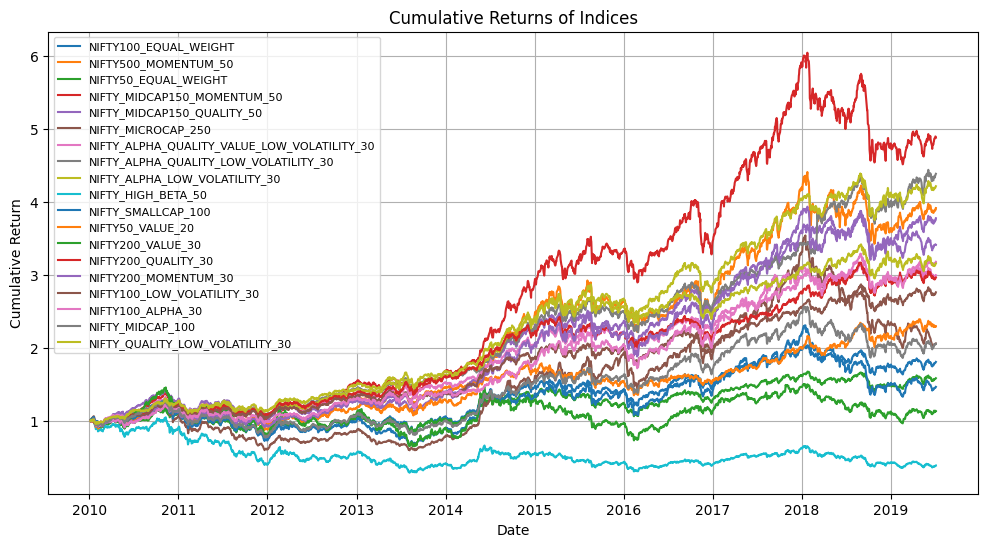

In [166]:
plt.figure(figsize=(12, 6))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)

plt.legend(loc='upper left', fontsize=8)
plt.title('Cumulative Returns of Indices')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

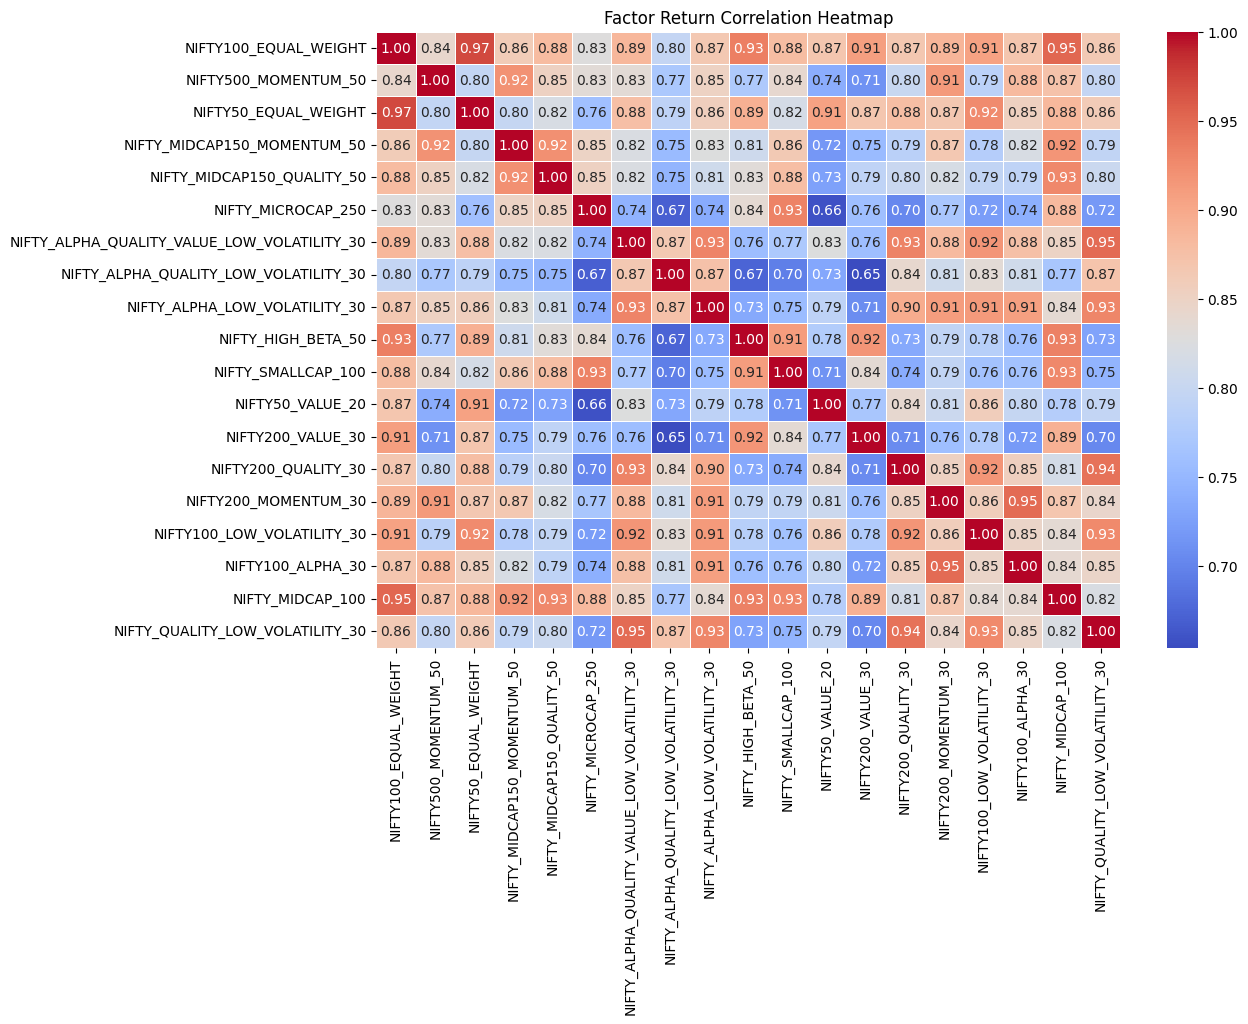

In [167]:
plt.figure(figsize=(12, 8))
sns.heatmap(returns.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Factor Return Correlation Heatmap')
plt.show()

QUALITY & VALUE INDEX

In [182]:
import warnings
warnings.filterwarnings("ignore")

index_files = {
    'NIFTY200_QUALITY_30_': 'NIFTY200_QUALITY_30_.csv',
    'NIFTY200_VALUE_30_': 'NIFTY200_VALUE_30_.csv',
    'NIFTY_50': 'NIFTY_50.csv'
}

nifty_quality_df = pd.read_csv(index_files['NIFTY200_QUALITY_30_'])
nifty_value_df = pd.read_csv(index_files['NIFTY200_VALUE_30_'])
nifty_50_df = pd.read_csv(index_files['NIFTY_50'])

nifty_quality_df['Date'] = pd.to_datetime(nifty_quality_df['Date'])
nifty_value_df['Date'] = pd.to_datetime(nifty_value_df['Date'])
nifty_50_df['Date'] = pd.to_datetime(nifty_50_df['Date'])

nifty_quality_df.set_index('Date', inplace=True)
nifty_value_df.set_index('Date', inplace=True)
nifty_50_df.set_index('Date', inplace=True)

nifty_quality_df['Normalized'] = nifty_quality_df['Close'] / nifty_quality_df['Close'].iloc[0] * 100
nifty_value_df['Normalized'] = nifty_value_df['Close'] / nifty_value_df['Close'].iloc[0] * 100
nifty_50_df['Normalized'] = nifty_50_df['Close'] / nifty_50_df['Close'].iloc[0] * 100

nifty_combined_df = (nifty_quality_df['Normalized'] + nifty_value_df['Normalized']) / 2


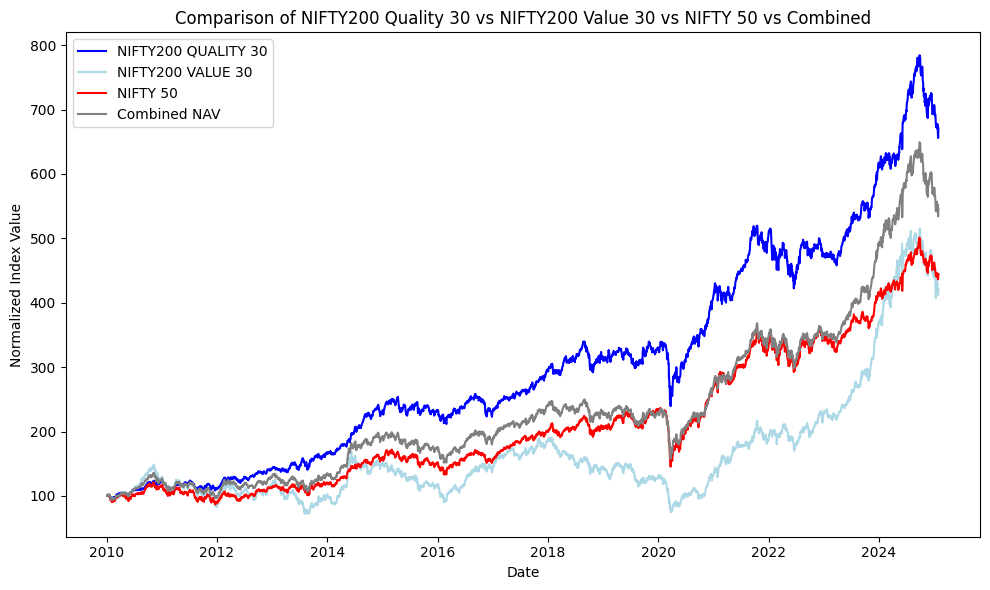

In [183]:
plt.figure(figsize=(10, 6))
plt.plot(nifty_quality_df['Normalized'], label='NIFTY200 QUALITY 30', color='BLUE')
plt.plot(nifty_value_df['Normalized'], label='NIFTY200 VALUE 30', color='LIGHTBLUE')
plt.plot(nifty_50_df['Normalized'], label='NIFTY 50', color='RED')
plt.plot(nifty_combined_df, label='Combined NAV', color='GREY')

plt.title('Comparison of NIFTY200 Quality 30 vs NIFTY200 Value 30 vs NIFTY 50 vs Combined')
plt.xlabel('Date')
plt.ylabel('Normalized Index Value')

plt.tight_layout()
plt.legend()
plt.show()

In [169]:
nifty_combined_df = (nifty_quality_df['Normalized'] + nifty_value_df['Normalized']) / 2


def calculate_metrics(index_df, benchmark_df):
    
    cagr = (index_df.iloc[-1] / index_df.iloc[0]) ** (1 / (len(index_df) / 252)) - 1
    
    rolling_max = index_df.cummax()
    drawdown = (index_df - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    
    daily_returns = index_df.pct_change().dropna()
    volatility = daily_returns.std() * np.sqrt(252)
    mean_return = daily_returns.mean() * 252  
    sharpe_ratio = mean_return / (daily_returns.std() * np.sqrt(252))
    rolling_return = index_df.pct_change(periods=252*3).dropna() * 100
    benchmark_return = benchmark_df.pct_change().dropna()
    

    return {
        'CAGR': cagr * 100,  
        'Max Drawdown': max_drawdown * 100,  
        'Volatility': volatility * 100, 
        'Sharpe Ratio': sharpe_ratio * 100, 
        '3-Year Rolling Return': rolling_return.mean(), 
    }

nifty_quality_metrics = calculate_metrics(nifty_quality_df['Normalized'], nifty_50_df['Normalized'])
nifty_value_metrics = calculate_metrics(nifty_value_df['Normalized'], nifty_50_df['Normalized'])
nifty_50_metrics = calculate_metrics(nifty_50_df['Normalized'], nifty_50_df['Normalized'])
nifty_combined_metrics = calculate_metrics(nifty_combined_df, nifty_50_df['Normalized'])


metrics_df = pd.DataFrame({
    'NIFTY200 Quality 30': nifty_quality_metrics,
    'NIFTY200 Value 30': nifty_value_metrics,
    'NIFTY 50 (Benchmark)': nifty_50_metrics,
    'Combined NAV': nifty_combined_metrics
})


metrics_df = metrics_df.T

metrics_df = metrics_df.applymap(lambda x: f"{x:.2f}%")
metrics_df

,CAGR,Max Drawdown,Volatility,Sharpe Ratio,3-Year Rolling Return
NIFTY200 Quality 30,13.67%,-29.51%,14.09%,98.05%,49.45%
NIFTY200 Value 30,10.17%,-60.74%,23.95%,52.49%,40.56%
NIFTY 50 (Benchmark),10.56%,-38.44%,16.66%,68.66%,40.67%
Combined NAV,12.11%,-36.87%,16.42%,77.87%,42.32%


In [ ]:
nifty_quality_returns = nifty_quality_df['Normalized'].pct_change().dropna()
nifty_value_returns = nifty_value_df['Normalized'].pct_change().dropna()
nifty_50_returns = nifty_50_df['Normalized'].pct_change().dropna()

nifty_quality_excess_returns = nifty_quality_returns - nifty_50_returns
nifty_value_excess_returns = nifty_value_returns - nifty_50_returns

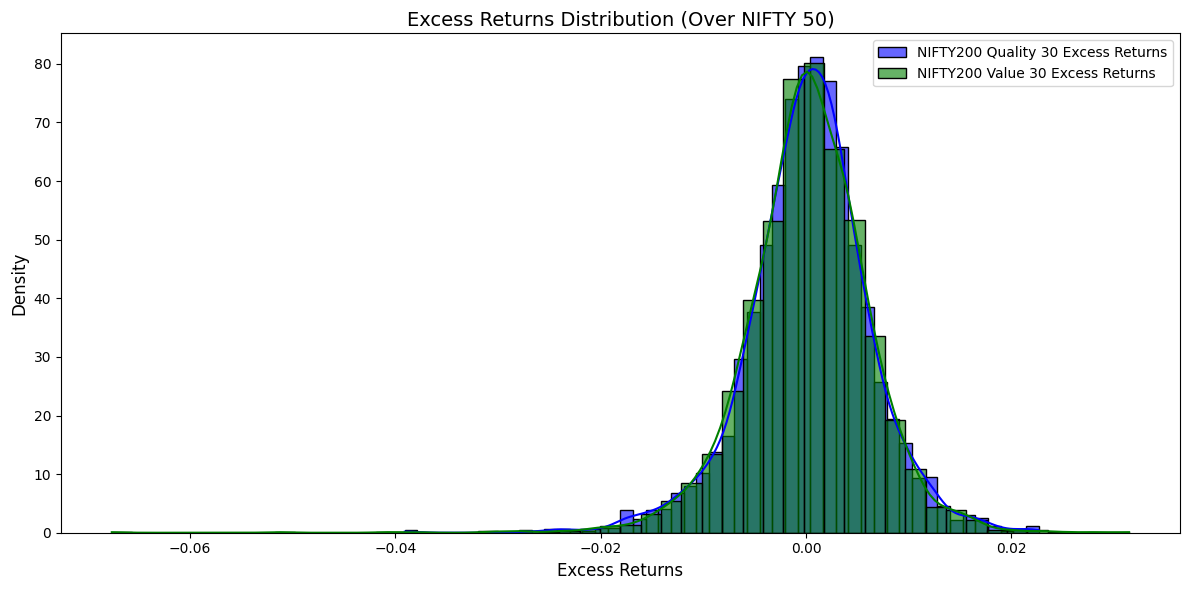

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(nifty_quality_excess_returns, kde=True, color='blue', label='NIFTY200 Quality 30 Excess Returns', stat='density', bins=50, alpha=0.6)
sns.histplot(nifty_value_excess_returns, kde=True, color='green', label='NIFTY200 Value 30 Excess Returns', stat='density', bins=50, alpha=0.6)

plt.title('Excess Returns Distribution (Over NIFTY 50)', fontsize=14)
plt.xlabel('Excess Returns', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


MOMENTUM & ALPHA INDEX

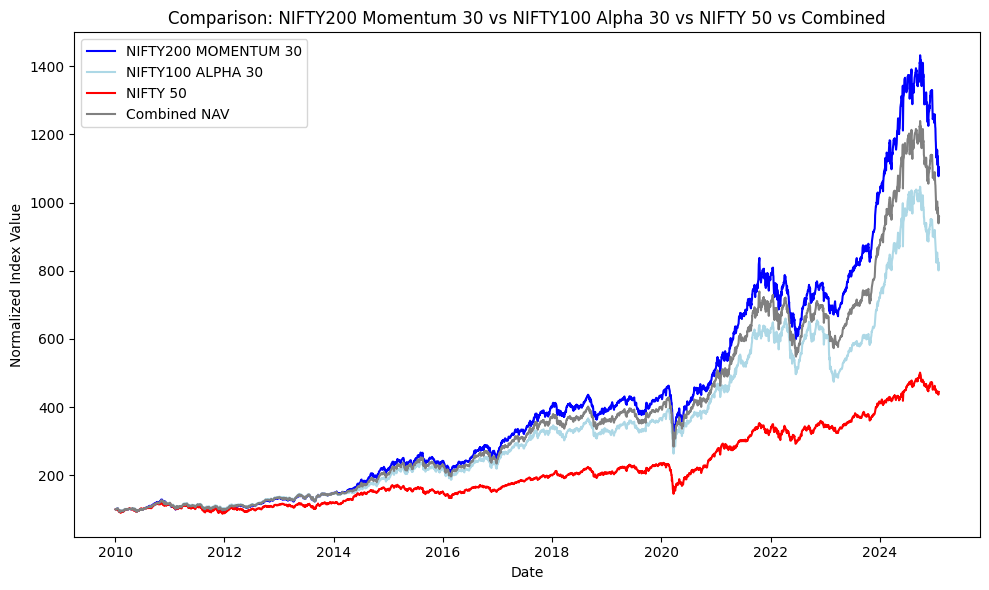

In [ ]:
import warnings
warnings.filterwarnings("ignore")


index_files = {
    'NIFTY200_MOMENTUM_30': 'NIFTY200_MOMENTUM_30.csv',
    'NIFTY100_ALPHA_30': 'NIFTY100_ALPHA_30.csv',
    'NIFTY_50': 'NIFTY_50.csv'
}


nifty_momentum_df = pd.read_csv(index_files['NIFTY200_MOMENTUM_30'])
nifty_alpha_df = pd.read_csv(index_files['NIFTY100_ALPHA_30'])
nifty_50_df = pd.read_csv(index_files['NIFTY_50'])


for df in [nifty_momentum_df, nifty_alpha_df, nifty_50_df]:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)


for df in [nifty_momentum_df, nifty_alpha_df, nifty_50_df]:
    df['Normalized'] = df['Close'] / df['Close'].iloc[0] * 100

nifty_combined_df = (nifty_momentum_df['Normalized'] + nifty_alpha_df['Normalized']) / 2


plt.figure(figsize=(10, 6))
plt.plot(nifty_momentum_df['Normalized'], label='NIFTY200 MOMENTUM 30', color='blue')
plt.plot(nifty_alpha_df['Normalized'], label='NIFTY100 ALPHA 30', color='lightblue')
plt.plot(nifty_50_df['Normalized'], label='NIFTY 50', color='red')
plt.plot(nifty_combined_df, label='Combined NAV', color='grey')

plt.title('NIFTY200 Momentum 30 vs NIFTY100 Alpha 30 vs NIFTY 50 vs Combined')
plt.xlabel('Date')
plt.ylabel('Normalized Index Value')

plt.legend()
plt.tight_layout()
plt.show()

In [179]:
nifty_combined_df = (nifty_momentum_df['Normalized'] + nifty_alpha_df['Normalized']) / 2

def calculate_metrics(index_df, benchmark_df):
    
    cagr = (index_df.iloc[-1] / index_df.iloc[0]) ** (1 / (len(index_df) / 252)) - 1
    
   
    rolling_max = index_df.cummax()
    drawdown = (index_df - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    daily_returns = index_df.pct_change().dropna()
    volatility = daily_returns.std() * np.sqrt(252)
    mean_return = daily_returns.mean() * 252 
    sharpe_ratio = mean_return / (daily_returns.std() * np.sqrt(252))
    rolling_return = index_df.pct_change(periods=252*3).dropna() * 100
    

    return {
        'CAGR': cagr * 100,  
        'Max Drawdown': max_drawdown * 100,  
        'Volatility': volatility * 100, 
        'Sharpe Ratio': sharpe_ratio * 100,  
        '3-Year Rolling Return': rolling_return.mean(),  
    }

nifty_momentum_metrics = calculate_metrics(nifty_momentum_df['Normalized'], nifty_50_df['Normalized'])
nifty_alpha_metrics = calculate_metrics(nifty_alpha_df['Normalized'], nifty_50_df['Normalized'])
nifty_50_metrics = calculate_metrics(nifty_50_df['Normalized'], nifty_50_df['Normalized'])
nifty_combined_metrics = calculate_metrics(nifty_combined_df, nifty_50_df['Normalized'])

metrics_df = pd.DataFrame({
    'NIFTY200 Momentum 30': nifty_momentum_metrics,
    'NIFTY100 Alpha 30': nifty_alpha_metrics,
    'NIFTY 50 (Benchmark)': nifty_50_metrics,
    'Combined NAV': nifty_combined_metrics
})


metrics_df = metrics_df.T
metrics_df = metrics_df.applymap(lambda x: f"{x:.2f}%")

metrics_df

,CAGR,Max Drawdown,Volatility,Sharpe Ratio,3-Year Rolling Return
NIFTY200 Momentum 30,17.50%,-34.21%,18.42%,96.88%,73.61%
NIFTY100 Alpha 30,15.25%,-33.14%,17.82%,88.67%,60.25%
NIFTY 50 (Benchmark),10.56%,-38.44%,16.66%,68.66%,40.67%
Combined NAV,16.45%,-33.72%,17.88%,94.21%,67.16%


In [185]:
nifty_momentum_returns = nifty_momentum_df['Normalized'].pct_change().dropna()
nifty_alpha_returns = nifty_alpha_df['Normalized'].pct_change().dropna()
nifty_50_returns = nifty_50_df['Normalized'].pct_change().dropna()

nifty_momentum_excess_returns = nifty_momentum_returns - nifty_50_returns
nifty_alpha_excess_returns = nifty_alpha_returns - nifty_50_returns

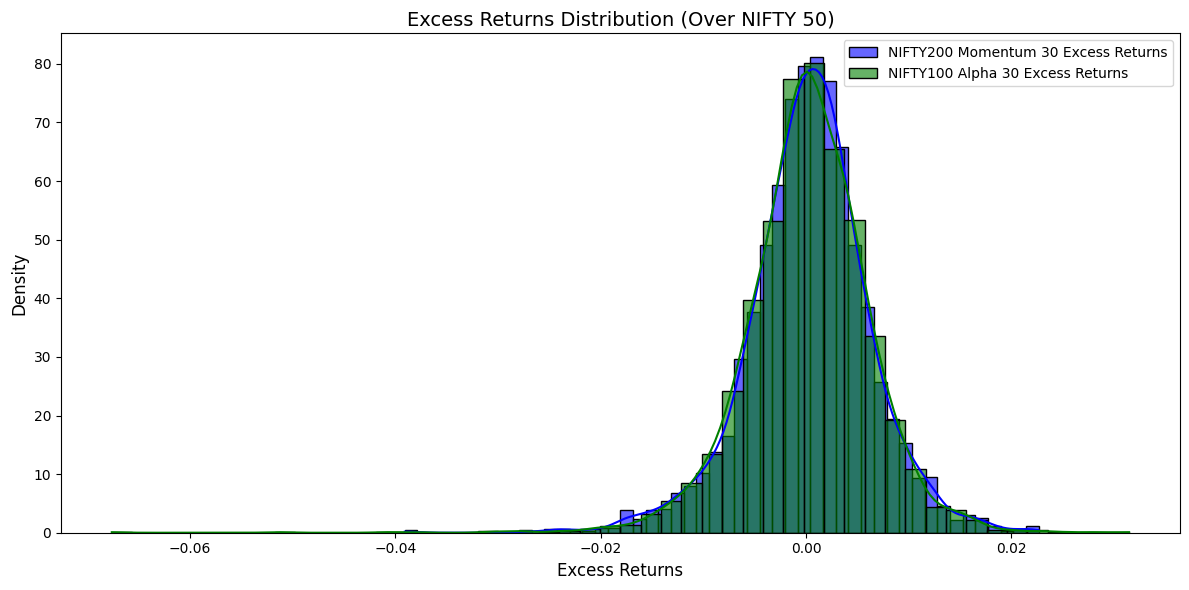

In [186]:
plt.figure(figsize=(12, 6))

sns.histplot(nifty_momentum_excess_returns, kde=True, color='blue', label='NIFTY200 Momentum 30 Excess Returns', stat='density', bins=50, alpha=0.6)
sns.histplot(nifty_alpha_excess_returns, kde=True, color='green', label='NIFTY100 Alpha 30 Excess Returns', stat='density', bins=50, alpha=0.6)

plt.title('Excess Returns Distribution (Over NIFTY 50)', fontsize=14)
plt.xlabel('Excess Returns', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

NIFTY 100 EQUAL WEIGHT & NIFTY MIDCAP 100 INDEX

In [188]:
index_files = {
    'NIFTY_EQUAL_WEIGHT': 'NIFTY100_EQUAL_WEIGHT.csv',
    'NIFTY_MIDCAP_100': 'NIFTY_MIDCAP_100.csv',
    'NIFTY_50': 'NIFTY_50.csv'
}

nifty_equal_weight_df = pd.read_csv(index_files['NIFTY_EQUAL_WEIGHT'])
nifty_midcap_100_df = pd.read_csv(index_files['NIFTY_MIDCAP_100'])
nifty_50_df = pd.read_csv(index_files['NIFTY_50'])

for df in [nifty_equal_weight_df, nifty_midcap_100_df, nifty_50_df]:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

for df in [nifty_equal_weight_df, nifty_midcap_100_df, nifty_50_df]:
    df['Normalized'] = df['Close'] / df['Close'].iloc[0] * 100

nifty_combined_df = (nifty_equal_weight_df['Normalized'] + nifty_midcap_100_df['Normalized']) / 2

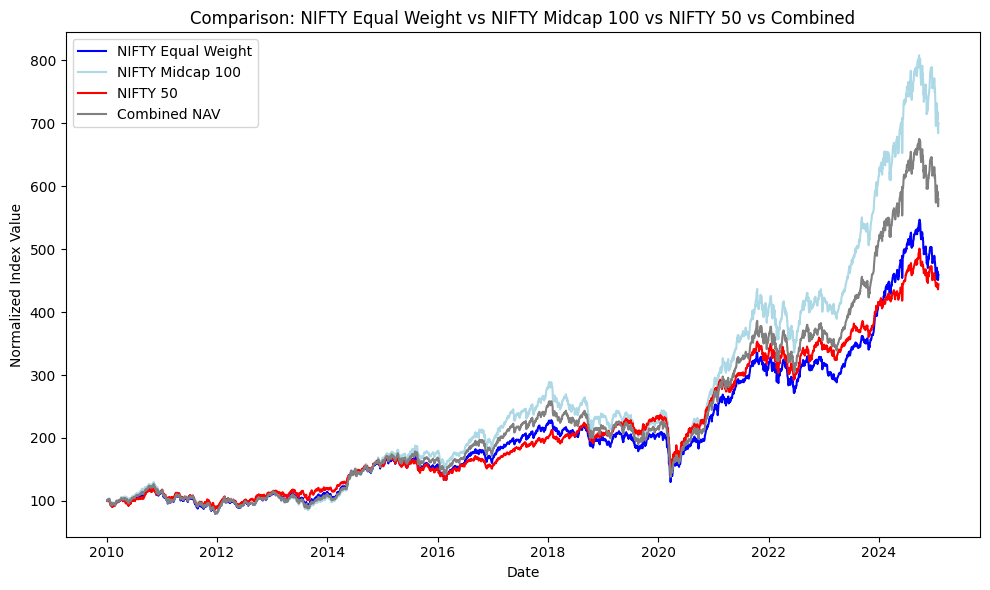

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(nifty_equal_weight_df['Normalized'], label='NIFTY Equal Weight', color='blue')
plt.plot(nifty_midcap_100_df['Normalized'], label='NIFTY Midcap 100', color='lightblue')
plt.plot(nifty_50_df['Normalized'], label='NIFTY 50', color='red')
plt.plot(nifty_combined_df, label='Combined NAV', color='grey')

plt.title('NIFTY Equal Weight vs NIFTY Midcap 100 vs NIFTY 50 vs Combined')
plt.xlabel('Date')
plt.ylabel('Normalized Index Value')

plt.legend()
plt.tight_layout()
plt.show()

In [190]:
nifty_combined_df = (nifty_equal_weight_df['Normalized'] + nifty_midcap_100_df['Normalized']) / 2

def calculate_metrics(index_df, benchmark_df):
    cagr = (index_df.iloc[-1] / index_df.iloc[0]) ** (1 / (len(index_df) / 252)) - 1

    
    rolling_max = index_df.cummax()
    drawdown = (index_df - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    daily_returns = index_df.pct_change().dropna()
    volatility = daily_returns.std() * np.sqrt(252)
    mean_return = daily_returns.mean() * 252
    sharpe_ratio = mean_return / (daily_returns.std() * np.sqrt(252))
    rolling_return = index_df.pct_change(periods=252*3).dropna() * 100

    return {
        'CAGR': cagr * 100,  
        'Max Drawdown': max_drawdown * 100,  
        'Volatility': volatility * 100, 
        'Sharpe Ratio': sharpe_ratio * 100,  
        '3-Year Rolling Return': rolling_return.mean(),  
    }

nifty_equal_weight_metrics = calculate_metrics(nifty_equal_weight_df['Normalized'], nifty_50_df['Normalized'])
nifty_midcap_100_metrics = calculate_metrics(nifty_midcap_100_df['Normalized'], nifty_50_df['Normalized'])
nifty_50_metrics = calculate_metrics(nifty_50_df['Normalized'], nifty_50_df['Normalized'])
nifty_combined_metrics = calculate_metrics(nifty_combined_df, nifty_50_df['Normalized'])

metrics_df = pd.DataFrame({
    'NIFTY Equal Weight': nifty_equal_weight_metrics,
    'NIFTY Midcap 100': nifty_midcap_100_metrics,
    'NIFTY 50 (Benchmark)': nifty_50_metrics,
    'Combined NAV': nifty_combined_metrics
})

metrics_df = metrics_df.T
metrics_df = metrics_df.applymap(lambda x: f"{x:.2f}%")

metrics_df

,CAGR,Max Drawdown,Volatility,Sharpe Ratio,3-Year Rolling Return
NIFTY Equal Weight,10.81%,-43.09%,17.19%,68.39%,42.35%
NIFTY Midcap 100,14.00%,-49.43%,18.39%,80.55%,57.60%
NIFTY 50 (Benchmark),10.56%,-38.44%,16.66%,68.66%,40.67%
Combined NAV,12.56%,-46.63%,17.63%,76.04%,50.26%


In [191]:
nifty_equal_weight_returns = nifty_equal_weight_df['Normalized'].pct_change().dropna()
nifty_midcap_100_returns = nifty_midcap_100_df['Normalized'].pct_change().dropna()
nifty_50_returns = nifty_50_df['Normalized'].pct_change().dropna()

nifty_equal_weight_excess_returns = nifty_equal_weight_returns - nifty_50_returns
nifty_midcap_100_excess_returns = nifty_midcap_100_returns - nifty_50_returns

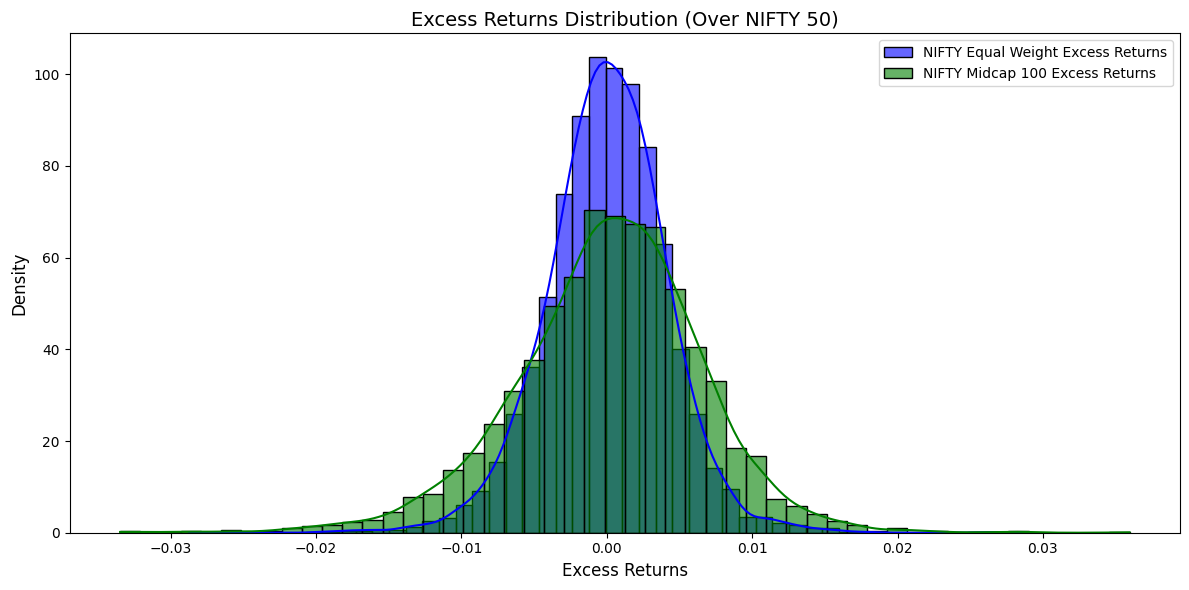

In [192]:
plt.figure(figsize=(12, 6))

sns.histplot(nifty_equal_weight_excess_returns, kde=True, color='blue', 
             label='NIFTY Equal Weight Excess Returns', stat='density', bins=50, alpha=0.6)
sns.histplot(nifty_midcap_100_excess_returns, kde=True, color='green', 
             label='NIFTY Midcap 100 Excess Returns', stat='density', bins=50, alpha=0.6)

plt.title('Excess Returns Distribution (Over NIFTY 50)', fontsize=14)
plt.xlabel('Excess Returns', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()